## Linear regression

In [46]:
import numpy as np

%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def linear_regression():
    # Step # 1 - Extract data
    points = np.genfromtxt('data.csv',delimiter = ',')
    # Step # 2 - Define hyperparameters
    
    ## Learning rate
    learning_rate = 0.0001
    
    
    ## Coefficients y = a * x + b
    init_a = 0
    init_b = 0
    
    ## number of iterations
    num_iterations = 10000
    
    
    # Step 3 - model training
    
    print(
        'Start learning at a = {0}, b = {1}, error = {2}'.format(
            init_a,
            init_b,
            compute_error(init_a, init_b, points)
        )
    )
    
    a, b = gradient_descent(init_a, init_b, points, learning_rate, num_iterations)
    
    print(
        'End learning at a = {0}, b = {1}, error = {2}'.format(
            a,
            b,
            compute_error(a, b, points)
        )
    )
    
    return a,b


def compute_error(a, b, points):
    '''
        Computes Error = 1/N * sum((y - (ax + b))^2)
    '''
    error = 0
    N = len(points) 
    for i in range(N):
        x = points[i,0]
        y = points[i,1]
        error += (y-(a*x+b))**2
    return error/N

def gradient_descent(starting_a, starting_b, points, learning_rate, num_iterations):
    '''
        Performs gradient step num_iterations times
        in order to find optimal a, b values
    '''
    a = starting_a
    b= starting_b
    
    for i in range(num_iterations):
        a, b = gradient_step(a,b,points,learning_rate)
    return a, b

def gradient_step(current_a, current_b, points, learning_rate):
    '''
        Updates a and b in antigradient direction
        with given learning_rate
    '''
    a = current_a
    b = current_b
    
    grad_a = 0
    grad_b = 0
    N = len(points)
    
    for i in range(N):
        x = points[i,0]
        y = points[i,1]
        
        grad_a += -(2/N) * (y - (a*x+b))*x
        grad_b += -(2/N) * (y - (a*x+b))
        
    a = current_a - learning_rate*grad_a
    b = current_b - learning_rate*grad_b
    
    return a,b

In [48]:
a, b = linear_regression()

Start learning at a = 0, b = 0, error = 5565.107834483211
End learning at a = 1.4675440436333027, b = 0.6078985997054931, error = 112.31533427075733


## Plot Cost funstion

In [49]:
def plot_decorator(f):
    points = np.genfromtxt('data.csv', delimiter=',')
    
    return lambda a, b: f(a, b, points)


cost = plot_decorator(compute_error)

In [50]:
A = np.linspace(-10, 12, 40)
B = np.linspace(-10, 12, 40)

A, B = np.meshgrid(A, B)
E = cost(A, B)

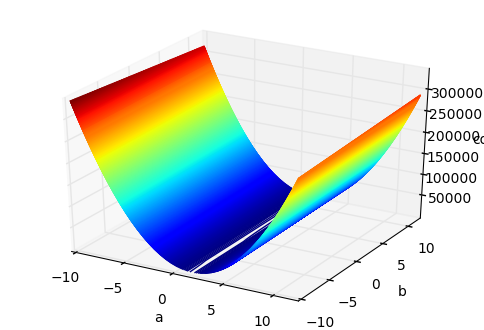

In [51]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(A, B, E, 1000)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('cost')

## Plot data and learned function

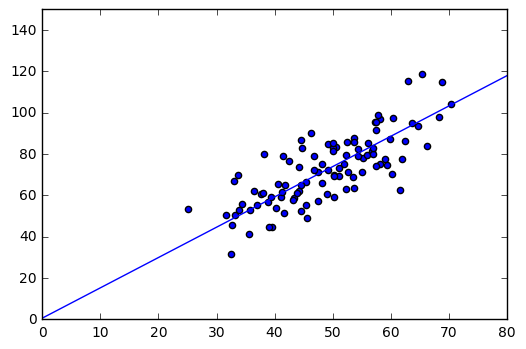

In [53]:
  points = np.genfromtxt('data.csv',delimiter = ',')

X = points[:, 0]
Y = points[:, 1]

plt.xlim(0, 80)
plt.ylim(0, 150)
plt.scatter(X, Y)

params = np.linspace(0, 150, 10)

plt.plot(params, a * params + b)

plt.show()
